In [5]:
import scipy.io as sio
data_path = r"D:\data\ssvep_dataset\MNE-lee2019-ssvep-data\session1\s1\sess01_subj01_EEG_SSVEP.mat"
file_data = sio.loadmat(data_path)['EEG_SSVEP_test']
for struct in file_data:
    # 打印出结构体中的所有变量名称和对应的值
    print("Structure variables:")
    for variable_name in struct.dtype.names:
        variable_value = struct[variable_name]
        print(f"{variable_name}")

Structure variables:
smt
x
t
fs
y_dec
y_logic
y_class
class
chan
ival
time_interval
EMG
EMG_index
pre_rest
post_rest
rest_interval


In [7]:
info_path = r"D:\data\ssvep_dataset\MNE-ssvepexo-data\info_ssvep_lee_dataset.mat"
info_data = sio.loadmat(info_path)['info']
print(info_data['fs'])

[[array([[1000]], dtype=uint16)]]


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

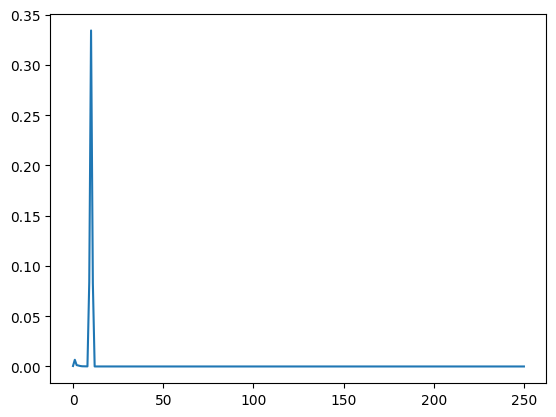

In [13]:
from neurodsp.sim import sim_combined
import matplotlib.pyplot as plt
sig = sim_combined(n_seconds=10, fs=500,
                   components={'sim_powerlaw': {}, 'sim_oscillation' : {'freq': 10}})
from neurodsp.spectral import compute_spectrum
from fooof.utils import trim_spectrum, interpolate_spectrum
from fooof.sim.gen import gen_power_spectrum
freqs, spectrum = compute_spectrum(sig, fs = 500)
print(freqs, spectrum )
plt.plot(freqs, spectrum)

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
freqs = np.fft.fftfreq(sig.shape[0], 1/500)
fft_result = np.fft.fft(sig, sig.shape[0])
spectrum_frequencies = np.abs(fft_result)**2/(500*sig.shape[0])
print(freqs.shape)
plt.plot(spectrum_frequencies)

In [12]:
print(spectrum_frequencies)

[3.47887659e-35 2.78116480e-01 1.61189784e+00 7.65743748e-02
 1.25678718e-01 2.85969625e-02 4.00700921e-02 2.15536911e-03
 7.04700987e-02 1.40046809e-02 3.10347187e-02 2.53982633e-02
 4.79514420e-02 1.64089876e-02 9.96448812e-04 1.06051176e-02
 5.20953503e-03 1.93791935e-02 6.55957427e-03 4.28091851e-03
 8.49074129e-03 3.09962552e-03 1.87128212e-03 2.14448170e-03
 4.16691475e-04 2.96174882e-04 9.79302894e-03 3.16018312e-04
 1.40342983e-03 1.97522241e-03 1.61354332e-03 4.22516202e-04
 1.12035419e-03 4.70770427e-03 1.47757982e-03 1.54327287e-03
 8.17096257e-04 2.10153988e-03 1.03073372e-03 3.17512647e-03
 2.37259591e-03 2.18855428e-03 2.46260607e-03 4.51455698e-04
 5.32691981e-04 1.30785251e-03 2.12108889e-03 9.71483643e-04
 7.15515413e-04 4.36095900e-04 3.16523960e-03 6.69361295e-05
 2.49590433e-04 5.16909726e-04 1.33774731e-03 1.42690430e-04
 7.17733002e-05 4.18114372e-04 1.46990910e-04 4.72795635e-04
 6.84352299e-05 2.12744278e-05 1.53491597e-04 2.01647512e-04
 2.50250803e-04 4.223836

In [ ]:
#! /use/bin/env python
''' **************************************
# Author       :leo-Ne
# Last modified:2020-12-09 21:13
# Email        : leo@email.com
# Filename     :TRCA.py
# Description  : 
**************************************'''
from __future__ import print_function
import sys

import numpy as np
from numpy import linalg as LA
from scipy.io import loadmat, savemat
from scipy import signal as SIG
from pearsonstimulation import pearsonCorr, pearsonCorr_int
import time
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def eprint(*args, **kwargs):
    print(*args, file=sys.stderr, **kwargs)
#errInfo = r'Error: <filter para in SSVEPFilter() is not defined>'
#sys.exit(errInfo)

class TRCA():
    def __init__(self, _Subject=None, fs=250):
        self._Sub         = _Subject
        self._eegData     = None
        self._eegFiltered = None
        dataDescription = {
                'shape':    None,
                'nChannel': None,
                'nSample':  None,
                'nEvent':   None,
                'nTrial':   None,
                'nBlock':   None
                }
        self._dataDescription= dataDescription.copy()
        # [nChennel, nSample, nEvent, nTrial, nBlock]
        self._trainData = None
        self._testData  = None
        self._W         = None
        self._label     = None      # Equal to event
        self._result    = None
        # TRCA Setting
        self._begin     = 2.0
        self._tCut      = 0.14
        self._tuse      = 1.0
        self._fs        = fs
        del dataDescription
        pass

    def loadData(self, filename):
        # process
        data, dataUse = None, None 
        if self._eegData is None:
            data = loadmat(filename)['data']
            chnls = np.array([47, 53, 54, 55, 56, 57, 60, 61, 62], np.int32)
            dataUse = data[chnls, :, :, :].copy()
            dataUse = np.int32(dataUse)
            self._eegData = dataUse.copy()
            # filter
            print('Data was firstly loaded!')
            shape = np.shape(dataUse)
            self._dataDescription['shape']    = shape
            self._dataDescription['nChannel'] = shape[0]
            self._dataDescription['nSample']  = shape[1]
            self._dataDescription['nEvent']   = shape[2]
            self._dataDescription['nTrial']   = shape[2]
            self._dataDescription['nBlock']   = shape[3]
            self._label = np.arange(0,shape[2],1)
            print('Labels are defined as:\t', self._label)
        else:
            print('Data was already loaded!')
        print("Scale of EEG: [%f, %f]\t" % (np.max(dataUse), np.min(dataUse)))
        del data, dataUse
        return

    def cutData(self, tBegin=-1, tuse=-1, tCut=0.14):
        fs = self._fs
        data = self._eegData.copy()
        if tBegin == -1 or tuse == -1 :
            tBegin = self._begin + self._tCut
            tEnd   = tBegin + self._tuse
            print('Data cut by default!')
        else:
            self._begin = tBegin
            self._tuse  = tuse
            self._tCut  = tCut
            tBegin = tBegin + tCut
            tEnd   = tBegin + tuse
            print('Data cut by setting!')
        nBegin = np.int32(fs * (tBegin))
        nEnd   = np.int32(fs * tEnd)
        dataUse = data[:, nBegin:nEnd, :, :]
        self._eegData = dataUse.copy()
        del data, nBegin, nEnd, dataUse
        return  
    
    def SSVEPFilter(self, filterType=0):
        """
        type
          0: nomal trca
          1: enhance trca
        """
        data         = self._eegData.copy()
        fs           = self._fs
        dataFiltered = None
        if filterType == 0:
            Wn           = [6.0, 90.0]
            Wn           = np.array(Wn, np.float64) / (fs/2)
            b, a         = SIG.cheby1(4, 0.1, Wn,btype  = "bandpass",analog = False,output = 'ba')
            dataFiltered = SIG.lfilter(b, a, data, axis = 1)
            del b, a ,Wn
        elif filterType == 1:
            sys.exit("Error:<filterType=1 means use Enhance trca by adding filter bank, to which Leo was lazy!!!>")
        self._eegFiltered = dataFiltered.copy()
        del data, dataFiltered
        return
    
    def testSet(self, testBlock=0):
        nBlocks         = self._dataDescription['nBlock']
        if testBlock not in range(nBlocks):
            sys.exit('Error:<The test block setting is out range!!!>')
        trainBlock = list(range(nBlocks))
        trainBlock.remove(testBlock)
        trainBlock      = np.array(trainBlock, np.int32)
        eegData         = self._eegFiltered.copy()
        self._testData  = eegData[:, :, :, testBlock][:, :, :, None]
        self._trainData = eegData[:, :, :, trainBlock]
        return 

    def trca1(self):
        trainData      = self._trainData.copy()
        trainDataShape = np.shape(trainData)
        nChannels      = trainDataShape[0]
        nSamples       = trainDataShape[1]
        nEvents        = trainDataShape[2]
        nBlocks        = trainDataShape[3]
        nTrials        = nBlocks * 1    # 1 trails for each task in each block.
        # process
        W         = np.zeros([nEvents, nChannels], np.float64)
        Q         = np.zeros([nChannels, nChannels], np.float64)
        S         = np.zeros_like(Q)
        trainData = trainData - np.mean(trainData, axis = 1)[:, None, :, :]
        for nEvent in range(nEvents):
            data = trainData[:, :, nEvent, :]
            UX   = np.reshape(data,[nChannels, nSamples * nTrials], order='C')
            Q    = np.matmul(UX, UX.T) / nTrials
            S    = np.zeros_like(Q)
            for xi in range(nTrials):
                for xj in range(nTrials):
                    if xi != xj:
                        data_i  = data[:, :, xi]
                        data_j  = data[:, :, xj]
                        S      += np.matmul(data_i, data_j.T)
            S = S / (nTrials * (nTrials-1))  
            eigenvalues, eigenvectors = LA.eig(np.matmul(LA.inv(Q), S))
            w_index = np.max(np.where(eigenvalues == np.max(eigenvalues)))
            W[nEvent, :] = eigenvectors[:, w_index].T
        self._W = W.copy()
        del trainData, nChannels, nSamples, nEvents, nTrials, trainDataShape, W, Q, S
        del UX, data, data_i, data_j, eigenvalues, eigenvectors, w_index 
        return 


    def classifier(self):
        trainData   = self._trainData.copy()
        nEvents     = self._dataDescription['nEvent']
        testData    = self._testData.copy()
        nTestBlock  = np.shape(testData)[3]
        W           = self._W.copy()
        temp_X      = np.mean(trainData, axis=3)

        coefficients = np.zeros([nEvents])
        result      = np.zeros([nEvents * nTestBlock], np.int32)
        for test_idx in  range(nEvents * nTestBlock):
            test_trial = testData[:, :, test_idx, 0]
            for i, w in enumerate(W):
                w = w[None, :]
                test_i = np.dot(w, test_trial)
                temp_i = np.dot(w, temp_X[:, :, i])
                coefficients[i], _ = pearsonr(test_i[0], temp_i[0])
                # coefficients[i]      = pearsonCorr(test_i[0], temp_i[0])
                # coefficients[i] = pearsonCorr_int(test_i[0], temp_i[0], precision=32)

            # print("Coefficients:\t", coefficients)
            label            = np.max(np.where(coefficients == np.max(coefficients)))
            result[test_idx] = label
        del trainData, nEvents, testData,nTestBlock, W, temp_X, coefficients, test_trial, test_i, temp_i, label
        self._result = result.copy()
        del result
        return 

    # def train(self,testBlock=0):
    #     self.testSet(testBlock=testBlock)
    #     self.trca1()
    #     return

    # def output(self):
    #     result        = self._result.copy()
    #     correctResult = np.arange(0,40,1,dtype    = np.int32)
    #     tureNum       = np.size(np.where((result == correctResult) == True))
    #     accuracy      = tureNum / np.size(result)
    #     tBegin = self._begin + self._tCut
    #     tEnd  = tBegin + self._tuse
    #     del result, correctResult, tBegin, tEnd
    #     return tureNum, accuracy

# def unitTest():
#     """
#     Test code logic.
#     """
#     sub        = r"D:\data\ssvep_dataset\S1.mat"
#     tBegin     = 3.0
#     tCut       = 0.14
#     tUse       = 1.0
#     filterType = 0
#     testBlock  = 1
#     
#     session = TRCA(_Subject=6,fs=250)
#     session.loadData(filename=sub)
#     session.cutData(tBegin,tUse,tCut)
#     session.SSVEPFilter(filterType)
# 
#     session.train(testBlock)
#     session.classifier()
# 
#     session.output()
#     pass
# 
# def CVTest(SubNum=None, logfile=None):
#     """
#     Cross Validation for testing algorithmic ability.
#     """
#     if SubNum == None:
#         sub = r"D:\data\ssvep_dataset\S1.mat"
#     else:
#         sub = r'./tsing/S'+str(SubNum)+r'.mat'
#     tBegin     = 2.5
#     tCut       = 0.14
#     tUse       = 1.0
#     filterType = 0
#     print('Subject:%s. Period of data:\t %.2f~%.2fs'% (sub, tBegin+tCut, tBegin+tCut+tUse))
#     s = 'Subject:%s. Period of data:\t %.2f~%.2fs.\n'% (sub, tBegin+tCut, tBegin+tCut+tUse)
# 
#     session = TRCA(_Subject=6,fs=250)
#     session.loadData(filename=sub)
#     session.cutData(tBegin,tUse,tCut)
#     session.SSVEPFilter(filterType)
#     averAcc = 0.0
#     for loop in range(6):
#         print('In loop: %d, test set: %d.' % (loop, loop), end=' ')
#         s = s + 'In loop: %d, test set: %d.' % (loop, loop)
#         session.train(testBlock=loop)
#         session.classifier()
#         tureNum, accuracy = session.output()
#         print("tureNum:%d/%d, accuracy:%.2f%%" % (tureNum, 40, accuracy * 100))
#         s = s + "tureNum:%d/%d, accuracy:%.2f%%\n" % (tureNum, 40, accuracy * 100)
#         averAcc += accuracy
#     print("Average accuracy:%.2f%%" % (100 * averAcc / 6))
#     s = s + "Average accuracy:%.2f%%\n" % (100 * averAcc / 6)
#     logfile.write(s)
# 
#     del sub
#     return
# 
# def allCVTest():
#     """
#     Do CV by using all data of subjects.
#     """
#     logFile = 'allTest_data_int_100'
#     log = open(logFile, 'w')
#     SubNum = [1, 2, 4, 6, 7]
#     print("================================================================")
#     t1 = time.process_time()
#     for subNum in SubNum:
#         CVTest(SubNum=subNum, logfile=log)
#         print("================================================================")
#     t = time.process_time() - t1
#     s = r'total used time(s): %.2f' % t
#     log.write(s)
#     log.close()

if __name__ == "__main__":
    # allCVTest()
    CVTest(SubNum=None)
    pass

In [ ]:
from moabb.datasets import Lee2019_SSVEP
dataset = Lee2019_SSVEP(train_run = True, test_run = None, resting_state = False, sessions=(1,2))
X, labels, meta = paradigm.get_data(dataset = dataset)